# Integration of spatial models in Gammapy

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import astropy.units as u
from gammapy.image.models import SkyEllipse
from gammapy.maps import Map
from scipy.integrate import cumtrapz

In [158]:
# Define sky model to simulate the data
spatial_model = SkyEllipse(lon_0="20.02497 deg", lat_0="0.13476 deg", semi_major="0.01 deg", e=0, theta="0 deg")

In [159]:
m = Map.create(skydir=(20, 0), binsz=0.01, width=(0.5, 0.5))

In [160]:
coords = m.geom.get_coord(mode="edges")

In [161]:
values = spatial_model(coords.lon * u.deg, coords.lat * u.deg).to_value("sr-1")

In [162]:
%%time
val = cumtrapz(values, x=coords.lon, axis=-1)
val = cumtrapz(val, x=coords.lat[:, 1:], axis=0)

CPU times: user 329 µs, sys: 70 µs, total: 399 µs
Wall time: 325 µs


In [163]:
data = np.diff(np.diff(val, axis=1), axis=0)

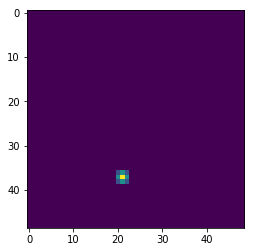

In [164]:
plt.imshow(-data)

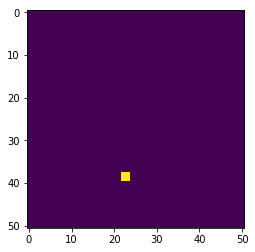

In [165]:
plt.imshow(values)